# Simulation 9 - Plotting NS3 Results

TJ Kim
8/13/20

Take CSV from youngbin and plot.

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab



# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim9")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *
from Cloud_PlanGenerator import *

In [2]:
import pandas as pd
data = pd.read_csv(os.path.curdir + "/sim_store/sim9/result.csv", error_bad_lines=False)

In [3]:
data

,Plan1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Plan2,Unnamed: 5,Unnamed: 6,Unnamed: 7,Plan3,Unnamed: 9,Unnamed: 10
0,0,0,2.553980,NaN,0,0,2.553980,NaN,0,0,2.55398
1,0,1,2.553660,NaN,0,1,2.553660,NaN,0,1,2.55366
2,0,2,2.553010,NaN,0,2,2.553010,NaN,0,2,2.55301
3,0,3,2.553130,NaN,0,3,2.553130,NaN,0,3,2.55313
4,0,4,2.602590,NaN,0,4,2.602590,NaN,0,4,2.60259
...,...,...,...,...,...,...,...,...,...,...,...
188,9,15,2.777330,NaN,9,15,2.553330,NaN,9,15,2.55333
189,9,16,0.614532,NaN,9,16,2.553530,NaN,9,16,2.55353
190,9,17,0.936949,NaN,9,17,0.947949,NaN,9,17,1.19595
191,9,18,0.928707,NaN,9,18,0.613707,NaN,9,18,2.55371


In [4]:
# Obtain all the plans transmission time
batch_seconds = pd.DataFrame.to_numpy(data["Unnamed: 2"])
SG_seconds = pd.DataFrame.to_numpy(data["Unnamed: 6"])
Myopic_seconds = pd.DataFrame.to_numpy(data["Unnamed: 10"])

# Pring All the plan average seconds
print("Batch mean (s):", np.mean(batch_seconds[batch_seconds<3.5]))
print("SG mean (s):", np.mean(SG_seconds[SG_seconds<3.5]))
print("Myopic mean (s):", np.mean(Myopic_seconds[Myopic_seconds<3.5]))

Batch mean (s): 1.542684692708333
SG mean (s): 1.7483774736842104
Myopic mean (s): 1.8902262460732986


In [5]:
# Batch
b_density = stats.gaussian_kde(batch_seconds)
b_xs = np.linspace(0.1,3.5,30)
b_density.covariance_factor = lambda : 0.04
b_density._compute_covariance()
dx = b_xs[1]-b_xs[0]
b_data = b_density(b_xs)
b_data /= (dx * b_data).sum()
b_cdf = np.cumsum(b_data* (dx))

# SG
s_density = stats.gaussian_kde(SG_seconds)
s_xs = np.linspace(0.1,3.5,30)
s_density.covariance_factor = lambda : 0.04
s_density._compute_covariance()

dx = s_xs[1]-s_xs[0]
s_data = s_density(s_xs)
s_data /= (dx * s_data).sum()
s_cdf = np.cumsum(s_data* (dx))

# Myopic
m_density = stats.gaussian_kde(Myopic_seconds)
m_xs = np.linspace(0.1,3.5,30)
m_density.covariance_factor = lambda : 0.04
m_density._compute_covariance()

dx = m_xs[1]-m_xs[0]
m_data = m_density(m_xs)
m_data /= (dx * m_data).sum()
m_cdf = np.cumsum(m_data* (dx))


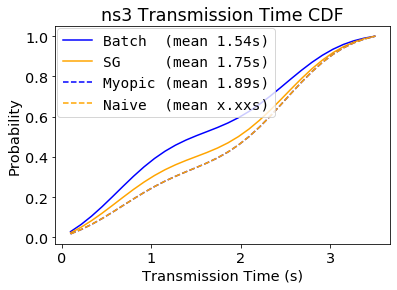

In [11]:
from matplotlib.pyplot import figure

# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14.5}

plt.rc('font', **font)


# Plot PDF
# plt.plot(b_xs, b_density(b_xs), label = 'Batch')
# plt.plot(s_xs, s_density(s_xs), label = 'SG')
# plt.plot(m_xs, m_density(m_xs), label = 'Myopic')

# figure(num=None, figsize=(5.5, 2.5), dpi=80, facecolor='w', edgecolor='k')


# Plot CDF
plt.plot(b_xs, b_cdf, label = 'Batch  (mean 1.54s)', color = 'blue')
plt.plot(s_xs, s_cdf, label = 'SG     (mean 1.75s)', color = 'orange')
plt.plot(m_xs, m_cdf, label = 'Myopic (mean 1.89s)', color = 'blue', linestyle='dashed')
plt.plot(m_xs, m_cdf, label = 'Naive  (mean x.xxs)', color = 'orange', linestyle='dashed')


plt.ylabel('Probability')
plt.title('ns3 Transmission Time CDF')
plt.xlabel('Transmission Time (s)')
plt.legend(borderaxespad=0.1,loc = "upper left",prop={'family': 'DejaVu Sans Mono'})


# plt.ylim(-.3,1)
plt.show()

In [163]:
b_cdf

array([0.02854652, 0.06387701, 0.10554253, 0.15237368, 0.20255708,
       0.2538503 , 0.30389782, 0.3505817 , 0.39233145, 0.42833244,
       0.45860225, 0.48393807, 0.50576232, 0.52590259, 0.54633807,
       0.56893651, 0.59520175, 0.62605568, 0.66168601, 0.70149426,
       0.74416882, 0.78788327, 0.83058809, 0.87033558, 0.90556682,
       0.93530004, 0.95919004, 0.97746437, 0.99077269, 1.        ])